
<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" />
  Image source: https://www.kaggle.com/
</p>

## Stage 1: Installing dependencies and setting up GPU environment

## Stage 2: Import dependencies for the project

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

## Stage 3: Dataset preprocessing



### Loading the dataset

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train.ndim

3

In [6]:
y_train.shape

(60000,)

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
import matplotlib.pyplot as plt


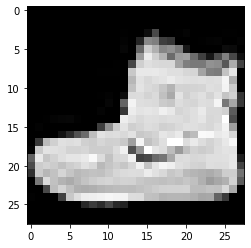

In [10]:
plt.imshow( X_train[0], cmap='gray' )
plt.show()

In [11]:
y_train[0]

9

### Image normalization



In [14]:
X_train.max()

255

In [15]:
X_train.min()

0

In [16]:
X_train = X_train / 255.0

In [17]:
X_train.max()

1.0

In [18]:
X_train.min()

0.0

In [20]:
X_test = X_test / 255.0

### Reshaping of the dataset



In [21]:
X_train.shape

(60000, 28, 28)

In [24]:
X_train = X_train.reshape(60000, 28*28 )

In [25]:
X_test.shape

(10000, 28, 28)

In [26]:
X_test = X_test.reshape(10000, 28*28)

In [27]:
28*28

784

In [28]:
X_train.shape

(60000, 784)

## Stage 4: Building an Artificial Neural network

### Defining the model



In [29]:
model = tf.keras.models.Sequential()

### Adding the first layer (Dense layer)

Layer hyper-parameters:
- number of units/neurons: 128
- activation function: ReLU
- input_shape: (784, )

In [30]:
model.add( tf.keras.layers.Dense(128, 'relu', input_shape = (784, ) ) )

### Adding a Dropout layer 



In [31]:
model.add( tf.keras.layers.Dropout(0.2))

### Adding the second layer (output layer)

- units == number of classes (10 in the case of Fashion MNIST)
- activation = 'softmax'

In [32]:
model.add( tf.keras.layers.Dense(10, 'softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Comiling the model

- Optimizer: Adam
- Loss: Sparse categorical crossentropy 

In [34]:
y_train.shape

(60000,)

In [35]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [36]:
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])

### Training the model

In [37]:
epoch_history = model.fit(X_train, y_train, epochs=10, validation_data= (X_test, y_test)  )

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5243 - accuracy: 0.8151 - val_loss: 0.4501 - val_accuracy: 0.8334
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3994 - accuracy: 0.8565 - val_loss: 0.3844 - val_accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3654 - accuracy: 0.8673 - val_loss: 0.3644 - val_accuracy: 0.8682
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3440 - accuracy: 0.8744 - val_loss: 0.3635 - val_accuracy: 0.8717
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3296 - accuracy: 0.8780 - val_loss: 0.3573 - val_accuracy: 0.8705
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3172 - accuracy: 0.8828 - val_loss: 0.3616 - val_accuracy: 0.8680
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3066 - accuracy: 0.8864 - val_loss: 0.3452 - val_accuracy:

### Model evaluation and prediction

In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8826


[0.33323344588279724, 0.8826000094413757]

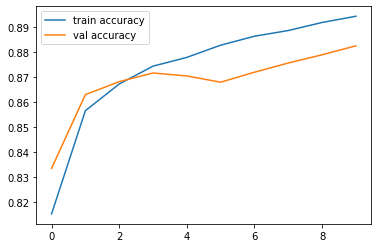

In [42]:
plt.plot( epoch_history.history['accuracy'] )
plt.plot( epoch_history.history['val_accuracy'])
plt.legend(['train accuracy', 'val accuracy'])
plt.show()

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
import os
os.chdir('/content/drive/MyDrive/kdigital2/deeplearning/model')

## Stage 5 : Saving the model

### Saving the architecture 

In [ ]:
# 전체 네트워크와 웨이트를 통으로 저장하고 불러오기

In [45]:
model.save('fashion_mnist_model')

INFO:tensorflow:Assets written to: fashion_mnist_model/assets


In [47]:
model2 = tf.keras.models.load_model('fashion_mnist_model')

In [48]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8826


[0.33323344588279724, 0.8826000094413757]

In [49]:
# 폴더 말고, 파일 하나로 저장하는 방법

In [50]:
model.save('fashion_mnist_model.h5')

In [52]:
model3 = tf.keras.models.load_model('fashion_mnist_model.h5')

In [53]:
model3.predict(X_test)

array([[3.42659320e-07, 2.58869726e-09, 1.97172140e-10, ...,
        1.10127935e-02, 1.21519781e-08, 9.68940139e-01],
       [1.29705143e-06, 3.96578477e-17, 9.99565303e-01, ...,
        5.24636061e-17, 7.28967451e-13, 6.97949788e-17],
       [6.40955111e-09, 1.00000000e+00, 4.06492756e-10, ...,
        1.09345010e-27, 3.45691639e-12, 1.15568441e-20],
       ...,
       [1.16349311e-05, 2.52642959e-12, 4.60718684e-06, ...,
        1.18002559e-13, 9.99975324e-01, 4.30890345e-16],
       [1.16243179e-07, 9.99776185e-01, 1.04910947e-09, ...,
        5.94253434e-16, 4.22696600e-10, 1.14843385e-10],
       [1.08028407e-05, 6.60443149e-08, 2.12958967e-05, ...,
        2.25330773e-03, 3.92066322e-05, 6.02761720e-05]], dtype=float32)

### Saving network weights

In [54]:
# 네트워크만 저장하고 불러오기

In [56]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout", "trainable": true, "dtype": "float32", "rate": 0.2, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": 

In [57]:
my_network = model.to_json()

In [58]:
with open('my_network.json', 'w') as json_file :
  json_file.write(my_network)

In [59]:
with open('my_network.json', 'r') as json_file :
  my_net2 = json_file.read()

In [60]:
my_net2

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout", "trainable": true, "dtype": "float32", "rate": 0.2, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": 

In [62]:
model4 = tf.keras.models.model_from_json(my_net2)

In [63]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [65]:
# model4는 네트워크만 가져온것이지, 학습완료된 웨이트는 가져온것이 아니라,
# 현재 웨이트는 학습이 안된, 랜덤으로 셋팅된 웨이트다. 
# 따라서 이것으로 예측을 수행하면 안된다.

model4.predict(X_test)

array([[0.06290956, 0.11368793, 0.08396397, ..., 0.12778367, 0.0692838 ,
        0.09069791],
       [0.03918244, 0.18317577, 0.08050296, ..., 0.10584468, 0.07565628,
        0.03683304],
       [0.06894797, 0.18202208, 0.09721857, ..., 0.08533653, 0.14883392,
        0.11944345],
       ...,
       [0.05413735, 0.09693034, 0.08510793, ..., 0.17992905, 0.07885638,
        0.07140625],
       [0.04942884, 0.1735439 , 0.07034922, ..., 0.12168846, 0.11207727,
        0.10793725],
       [0.07285376, 0.10139898, 0.11173637, ..., 0.10807678, 0.08663759,
        0.08042299]], dtype=float32)

In [55]:
# 웨이트만 저장하고 불러오기

In [66]:
model.save_weights('fashion_mnist_weight.h5')

In [67]:
model4.load_weights('fashion_mnist_weight.h5')

In [68]:
model4.predict(X_test)

array([[3.42659320e-07, 2.58869726e-09, 1.97172140e-10, ...,
        1.10127935e-02, 1.21519781e-08, 9.68940139e-01],
       [1.29705143e-06, 3.96578477e-17, 9.99565303e-01, ...,
        5.24636061e-17, 7.28967451e-13, 6.97949788e-17],
       [6.40955111e-09, 1.00000000e+00, 4.06492756e-10, ...,
        1.09345010e-27, 3.45691639e-12, 1.15568441e-20],
       ...,
       [1.16349311e-05, 2.52642959e-12, 4.60718684e-06, ...,
        1.18002559e-13, 9.99975324e-01, 4.30890345e-16],
       [1.16243179e-07, 9.99776185e-01, 1.04910947e-09, ...,
        5.94253434e-16, 4.22696600e-10, 1.14843385e-10],
       [1.08028407e-05, 6.60443149e-08, 2.12958967e-05, ...,
        2.25330773e-03, 3.92066322e-05, 6.02761720e-05]], dtype=float32)